# Bar Graph of Averaged Popularity for Each Temp Range of Songs

In [2]:
from cs103 import *
from typing import NamedTuple, List, Optional
from enum import Enum
import csv

### Step 1a: Planning

The songs.csv file contains a million popular contemporary songs between 1924 and 2010.

For each song, the data includes 6 features:

- **Title**
- **Artist**
- **Year** released
- **Popularity** in percentage points
- **Duration** in seconds (s)
- **Tempo** of beats per minute (bpm)

### Step 1b: Planning

Ideas of what this program operating on this information might produce:

- find the year with the greatest popularity
- average the tempo for each artist
- plot the number of songs released over year
- find the average duration of the songs
- find relationship between duration and tempo

This program will produce a **visual bar graph** representing the relationship between the **popularity** and **tempo**. The tempo will be grouped in 40's, and the popularity within the tempo range will be averaged. For example, a tempo range of [160, 200),which is labeled as 160-199, and its height is determined by the averaged popularity. The x-axis will be labeled as tempo range, leaving the y-axis labeled as the averaged popularity. As a result, the songs' duration and tempo information will be read and analyzed.

Note: If the popularity or tempo is unknown, then the song will not be considered in the calculation. This is because the value 0 would be given for either popularity or tempo, which will provide false information when creating the graph. Therefore, the song will not be considered.

### Step 1c: Planning

Example of the kind of output expected from this program: a bar graph representing the relationship between the popularity and tempo.

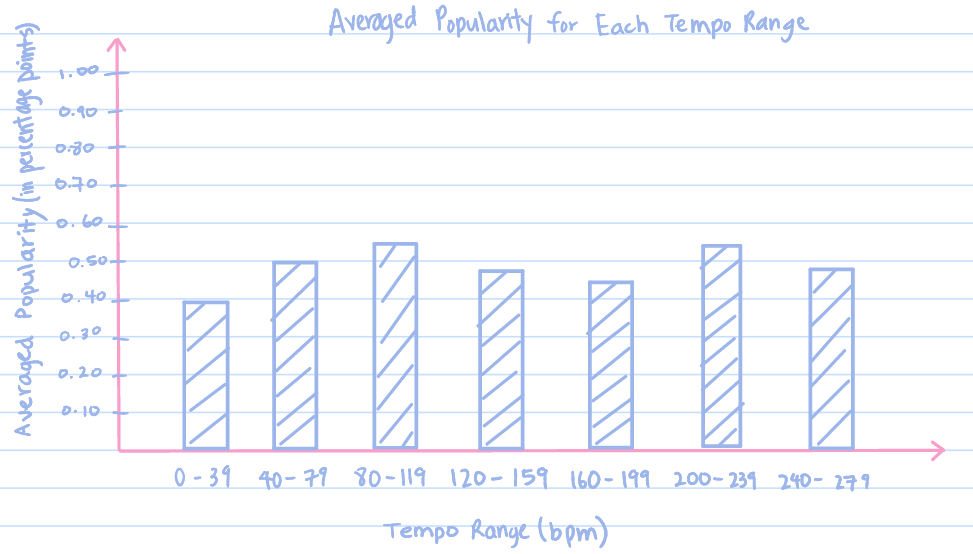

### Step 2a: Building

The importance of each data defintion:

- Popularity will be used to calculate the average, which will be plotted on the y-axis of the graph. Optional will be used, where the popularity is known (float) or unknown (None).

- List[Popularity] will be a list of Popularities, as the list of averaged popularities will be needed for each tempo range. Also, List[Popularity] will be used as an input for some functions.

- Song will be represented by compound to feature two aspects of a song: Popularity and tempo, which is a float type. 

- List[Song] will be a list of songs, as the information will be given as List[Song].

In [3]:
##################
# Data Definitions

Popularity = Optional[float]  # in range[0.0, 1.0]
# interp. the popularity of a song in percentage 
#         points or None if popularity is unknown

P1 = None
P2 = 0.0
P3 = 0.542898743
P4 = 0.442094857
P5 = 1.0

@typecheck
def fn_for_popularity(p: Popularity) -> ...:
    # Template based on optional (2 cases), 
    # atomic distinct (1 time), and
    # atomic non-distinct (1 time)
    if p is None:
        return ...
    else:
        return ...(p)
    
# List[Popularity]
# interp. a list of popularity

LOP1 = []
LOP2 = [P1, P2]
LOP3 = [P3, P4, P5]

@typecheck
def fn_for_lop(lop: List[Popularity]) -> ...:
    # Template based on arbitrary-sized and 
    # the reference rule
    # acc description
    acc = ...  # type: ...
    for p in lop:
        acc = ...(fn_for_popularity(p), acc)
        
    return ...(acc)
    

Song = NamedTuple('Song', [('popularity', Popularity),
                           ('tempo', float)])   # in range[0,280]
# interp. a song's popularity in percentage points 
#         ('popularity') and tempo in seconds ('tempo')

S1 = Song(0.0, 0.0)
S2 = Song(0.542898743, 87.002)
S3 = Song(0.442094857, 80.525)
S4 = Song(None, 183.38)
S5 = Song(1.0, 80.00)

@typecheck
def fn_for_song(s: Song) -> ...:
    # Template based on compound (2 cases)
    # and the reference rule
    return ...(fn_for_popularity(s.popularity),
               (s.tempo))

# List[Song]
# interp. a list of songs

LOS1 = []
LOS2 = [S1, S2]
LOS3 = [S3, S4, S5]

@typecheck
def fn_for_los(los: List[Song]) -> ...:
    # Template based on arbitrary-sized
    # and the reference rule
    # description of acc
    acc = ...  # type: ...
    for s in los:
        acc = ...(fn_for_song(s), acc)
    return ...(acc)

### Step 2b and 2c: Building

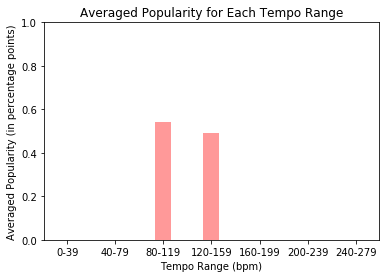

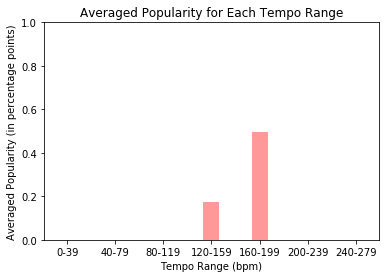

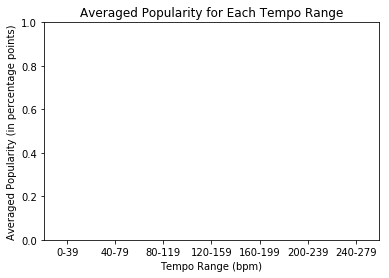

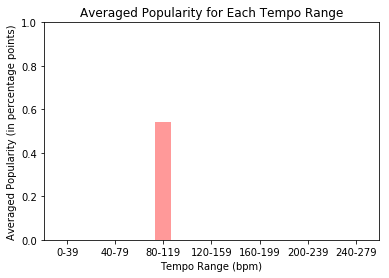

33 of 33 tests passed


In [5]:
###########
# Functions
@typecheck
def main(songs: str) -> None:
    '''
    Reads the songs data from given filename, songs, and displays 
    them in a bar chart of averaged popularities against tempo ranges
    '''
    #return None  #stub
    # Template from HtDAP, based on composition
    return display_bar_chart(read(songs))

@typecheck
def read(songs: str) -> List[Song]:
    '''
    reads information from the songs file and returns list of songs
    '''
    # Template from HtDAP
    # los contains the result so far
    los = []  # type: List[Song]
    
    with open(songs) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line
        
        for row in reader:
            if is_valid(row[3]):
                popularity = parse_float(row[3]) 
                tempo = parse_float(row[5])
                s = Song(popularity, tempo)
                los.append(s)
    
    return los

@typecheck
def is_valid(ss: str) -> bool:
    """
    returns True if ss is an float, False otherwise
    """
    #return True  #stub
    #Template based on atomic non-distinct
    return ss != 'nan'

@typecheck
def display_bar_chart(los: List[Song]) -> None:
    '''
    display a bar chart showing the averaged song popularity by tempo range
    
    the tempo ranges are assumed to start at 0 beats per minute (bpm) and span 40 bpm,
    with a maximum of 280 bpm
    '''
    #return None
    # Template based on visualization
    
    # the width of each bar
    bar_width = 0.5
    
    # the left side for each of the bars for the bar chart
    # we want to space them every 1 pixel, since we used a bar width of 0.5.
    left_side_of_bars = produce_bar_lefts(list_averaged_popularity(los), 0, bar_width + 1.0)
    
    # the opacity for the bars. It must be between 0 and 1, and higher numbers are more opaque (darker)
    opacity = 0.4
    
    # create the first bar chart
    rects1 = plt.bar(left_side_of_bars, 
                     list_averaged_popularity(los),        # list containing the height for each bar, here the logd
                     bar_width,
                     alpha=opacity,                 # set the opacity
                     color='r')                     # set the colour (here, pink)
    
    plt.title('Averaged Popularity for Each Tempo Range')
    plt.xlabel('Tempo Range (bpm)')
    plt.ylabel('Averaged Popularity (in percentage points)')
    
    # set the domain and range
    plt.axis([None, None, 0.0, 1.0])
    
    # set the x-coordinate for positioning the labels. Here, we want each label to be in the middle of each bar
    x_coord_labels = left_side_of_bars
    
    # set the labels for each 'tick' on the x-axis
    tick_labels = produce_tempo_labels(get_tempo(los))
    
    plt.xticks(x_coord_labels, tick_labels)
    
    # show the plot
    plt.show()
    
    return None

@typecheck
def produce_bar_lefts(values: List[float], initial: float, gap: float) -> List[float]:
    """
    Produce appropriate left sides for the right number of bars for values. The number
    of lefts is equal to len(values). The first value is initial. The gap between values
    is gap.
    
    E.g., [5,15,25,35,45,55,65,75] for 8 values, initial == 5, and gap == 10.
    """
    #return []  #stub
    # Template from List[Song] with two additional parameters
    
    # lefts is the left-side x-values for the values seen so far
    lefts = []  # type: List[float]
    
    # next_left is the next x value to use
    next_left = initial
    
    for val in values:
        lefts.append(next_left)
        next_left = next_left + gap
    
    return lefts

@typecheck
def produce_tempo_labels(values: List[float]) -> List[str]:
    """
    produce appropriate labels for the tempo ranges for the given values
    
    Starts at the 0-39 tempo range and continues until 240-279. 
    e.g. ['0-39', '40-79', ..., '240-279']
    """
    #return []  #stub
    # Template from List[float]
    # labels is the labels for the values seen so far
    labels = []
    
    # type: List[str]
    
    for i in range(0, 7):
        label = str(i*40) + "-" + str(i*40 + 39)
        labels.append(label)
    
    return labels

@typecheck
def get_tempo(los: List[Song]) -> List[float]:
    '''
    returns a list of tempo
    '''
    #return []  #stub
    # Template from List[Song]
    # list_of_popularity stores the song popularities seen so far in los
    list_of_tempo = []  # type: List[float]
    for s in los:
        list_of_tempo.append(s.tempo)
    
    return list_of_tempo

@typecheck
def popularity_within_range(los: List[Song], start: int, end: int) -> List[Popularity]:
    '''
    returns a list of the popularity for given tempo range of [start, end)
    in increasing order of the tempo range.
    
    For example, given los as [Song(0.45, 0), Song(0.21, 20), Song(0.36, 15)], 
    0 as the start range, and 20 as the end range, [0.45, 0.36] is returned
    for the tempo range [0, 40) AKA "0-39".
    '''
    #return 0.0  #stub
    # Template based on List[Song] with two additional int parameters
    # acc stores the song popularity that in within the [start, end) range so far in los
    acc = []  # type: List[Popularity]
    
    for s in los:
        if within_tempo_range(s, start, end):
            acc.append(s.popularity)
            
    return acc
    
@typecheck
def within_tempo_range(s: Song, start: int, end: int) -> bool:
    '''
    returns True when the song is within the tempo range [start, end)
    '''
    #return False  #stub
    # Template from Song with two additional int parameters
    if start <= s.tempo < end:
        return True
    return False
    
@typecheck
def averaged_popularity(lop: List[Popularity]) -> float:
    '''
    returns the averaged song popularity, rounded to
    three decimal places
    '''
    #return 0.0  #stub
    # Template from List[Popularity]
    # acc adds the song popularities in lop so far 
    acc = 0  # type: float
    for p in lop:
        acc =  acc + popularity_value(p)
        
    return round(acc/len(lop), 3)

@typecheck
def popularity_value(p: Popularity) -> float:
    '''
    returns the value of p, unless p is None,
    where 0.0 is returned
    
    Note: unknown popularity values will be filtered
    out but this helper function is needed for referencing
    popularity values in averaged_popularity function
    '''
    #return 0.0
    # Template from Popularity
    if p is None:
        return 0.0
    else:
        return p
    
@typecheck
def averaged_popularity_within_range(los: List[Song], start: int, end: int) -> float:
    '''
    returns the average of the popularities in the lise
    '''
    #return 0.0
    # Template for composition
    return averaged_popularity(popularity_within_range(los, start, end))

@typecheck
def list_averaged_popularity(los: List[Song]) -> List[float]:
    '''
    returns a list of averaged popularity for each tempo range in increasing order
    '''
    #return []  #stub
    # Template based on atomic and reference rule?
    # acc
    acc = [0, 0, 0, 0, 0, 0, 0]  # type: List[float]
    
    for s in los:
    
        if within_tempo_range(s, 0, 40):
            acc[0] = averaged_popularity_within_range(los, 0, 40)

        elif within_tempo_range(s, 40, 80):
            acc[1] = averaged_popularity_within_range(los, 40, 80)

        elif within_tempo_range(s, 80, 120):
            acc[2] = averaged_popularity_within_range(los, 80, 120)

        elif within_tempo_range(s, 120, 160):
            acc[3] = averaged_popularity_within_range(los, 120, 160)
            
        elif within_tempo_range(s, 160, 200):
            acc[4] = averaged_popularity_within_range(los, 160, 200)
            
        elif within_tempo_range(s, 200, 240):
            acc[5] = averaged_popularity_within_range(los, 200, 240)
            
        elif within_tempo_range(s, 240, 280):
            acc[6] = averaged_popularity_within_range(los, 240, 280)
    
    return acc


# Begin Testing
start_testing()

# Examples and tests for main
expect(main('songs_test1.csv'), None)

# the bar chart should look a bit like this:

#       Averaged Popularity for Each Tempo Range

#  Averaged Popularity (in percentage points)
# 1.0 |
#     |
# 0.8 |
#     |
# 0.6 |   *         
#     |   *         *
# 0.4 |   *         *
#     |   *         *
# 0.2 |   *         * 
#     |   *         *
#     +--------------------------------------> Tempo Range (bpm)
#       80-119   120-159   


expect(main('songs_test2.csv'), None)

# the bar chart should look a bit like this:

#       Averaged Popularity for Each Tempo Range

#  Averaged Popularity (in percentage points)
# 1.0 |
#     |
# 0.8 |
#     |
# 0.6 |            
#     |             *
# 0.4 |             *
#     |             *
# 0.2 |   *         * 
#     |   *         *
#     +--------------------------------------> Tempo Range (bpm)
#      120-159    160-199


# Examples and tests for read
expect(read('songs_test1.csv'), [Song(0.542898743, 87.002), 
                                 Song(0.473346541, 135.598), 
                                 Song(0.503752061, 134.899)])
expect(read('songs_test2.csv'), [Song(0.352232225, 124.824), Song(0, 123.958),
                                 Song(0.669413098, 169.598), Song(0.323112121, 164.113)])

# Examples and tests for is_valid
expect(is_valid('nan'), False)
expect(is_valid('45.67'), True)


# Examples and tests for analyze
# Examples and tests for display_bar_chart
expect(display_bar_chart([]), None)

# the bar chart should look a bit like this:

#       Averaged Popularity for Each Tempo Range

#  Averaged Popularity (in percentage points)
# 1.0 |
#     |
# 0.8 |
#     |
# 0.6 |        
#     |   
# 0.4 |       
#     |      
# 0.2 |            
#     |   
#     +--------------------------------------> Tempo Range (bpm)

expect(display_bar_chart(LOS2), None)
# LOS2 = [S1, S2]
# S1 = Song(0.0, 0.0)
# S2 = Song(0.542898743, 87.002)

# the bar chart should look a bit like this:

#       Averaged Popularity for Each Tempo Range

#  Averaged Popularity (in percentage points)
# 1.0 |
#     |
# 0.8 |
#     |
# 0.6 |        
#     |           *
# 0.4 |           *
#     |           *
# 0.2 |           *
#     |           *
#     +--------------------------------------> Tempo Range (bpm)
#        0-39   80-119


# Examples and tests for produce_bar_lefts
expect(produce_bar_lefts([], 5, 10), [])
expect(produce_bar_lefts([1, 10, 3], 5, 10), [5, 15, 25])
expect(produce_bar_lefts([1, 10, 3], 0.5, 3.5), [0.5, 4.0, 7.5])

# Examples and tests for produce_tempo_labels
expect(produce_tempo_labels([]), ['0-39', '40-79', '80-119', '120-159', '160-199', '200-239', '240-279'])
expect(produce_tempo_labels([1, 10, 3]), ['0-39', '40-79', '80-119', '120-159', '160-199', '200-239', '240-279'])

# Examples and tests for get_tempo
expect(get_tempo([]), [])
expect(get_tempo(LOS2), [0.0, 87.002])
expect(get_tempo(LOS3), [80.525, 183.38, 80.0])

# Examples and tests for popularity_within_range
expect(popularity_within_range([], 0, 20), [])
expect(popularity_within_range(LOS2, 0, 20), [0.0])
expect(popularity_within_range(LOS2, 80, 100), [0.542898743])
expect(popularity_within_range(LOS3, 80, 100), [0.442094857, 1.0])

# Examples and tests for within_tempo_range
expect(within_tempo_range(Song(0.0, 0.0), 0, 20), True)
expect(within_tempo_range(Song(0.0, 0.0), 20, 40), False)
expect(within_tempo_range(Song(None, 183.38), 180, 200), True)

# Examples and tests for averaged_popularity
expect(averaged_popularity(LOP2), 0.0)
expect(averaged_popularity(LOP3), 0.662)

# Examples and tests for popularity_value
expect(popularity_value(None), 0.0)
expect(popularity_value(0.3984), 0.3984)
expect(popularity_value(100.9), 100.9)

# Examples and tests for averaged_popularity_within_range
expect(averaged_popularity_within_range(LOS2, 0, 20), 0.0)
expect(averaged_popularity_within_range(LOS2, 80, 100), 0.543)
expect(averaged_popularity_within_range(LOS3, 80, 100), 0.721)

# Examples and tests for list_averaged_popularity
expect(list_averaged_popularity(LOS2), [0.0, 0, 0.543, 0, 0, 0, 0])
expect(list_averaged_popularity(LOS3), [0.0, 0, 0.721, 0, 0, 0, 0])

# Show testing summary
summary()

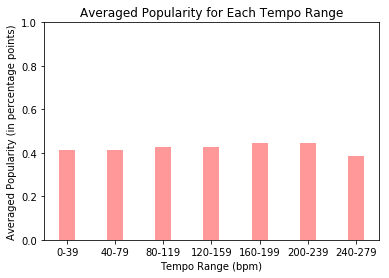

In [6]:
main('songs_shortened2.csv')              #data of 1000 songs